# **Algoritmos de Reconstrucción de Series Temporales**

Autor: Sergio Diaz Paredes

Contacto: [Linkedin](https://www.linkedin.com/in/sergio-diaz-paredes/)

## Paquetes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf

## Importando series

In [3]:
symbols = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'TSLA', 'FB', 'JPM', 'V', 'JNJ', 'WMT',
    'BABA', 'PG', 'NVDA', 'MA', 'UNH', 'HD', 'VZ', 'INTC', 'PFE', 'CMCSA',
    'KO', 'NFLX', 'DIS', 'XOM', 'CSCO', 'T', 'ABT', 'CRM', 'ADBE', 'PEP',
    'ABBV', 'CVX', 'BAC', 'NKE', 'MCD', 'MRK', 'ORCL', 'IBM', 'AMGN', 'QCOM',
    'SPOT', 'GILD', 'AMD', 'TWTR', 'PYPL', 'LMT', 'NOW', 'BKNG', 'UPS', 'FDX',
    'BRK-B', 'GS', 'MO', 'GE', 'CAT', 'MMM', 'F', 'CMG', 'SBUX', 'SNE', 'TM',
    'PDD', 'NIO', 'ZM', 'SQ', 'SHOP', 'ROKU', 'SNAP', 'UBER', 'NOK', 'WORK',
    'AAP', 'DAL', 'UAL', 'CCL', 'RCL', 'AAL', 'ZNGA', 'X', 'GM', 'JBLU',
    'SAVE', 'HOG', 'LUV', 'MGM', 'AMC', 'VIAC', 'CNK', 'DKNG', 'RKT', 'PLTR',
    'DOCU', 'SNOW', 'ZS', 'CRWD', 'NET', 'OKTA', 'TWLO', 'DDOG', 'ABNB', 'LMND',
    'OPEN', 'UPST', 'FVRR', 'SE', 'PLUG', 'FSLY', 'TDOC', 'ETSY', 'ZEN', 'TSM',
    'STNE']

In [4]:
serie = 'NVDA'

In [5]:
cotizacion = yf.download(serie, start='2024-07-01')
cotizacion.head(5)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2024-07-01,124.280807,124.300003,124.839996,118.830002,123.470001,284885500
2024-07-02,122.651054,122.669998,123.410004,121.029999,121.129997,218374000
2024-07-03,128.260193,128.279999,128.279999,121.360001,121.660004,215749000
2024-07-05,125.810570,125.830002,128.850006,125.680000,127.379997,214176700
2024-07-08,128.180191,128.199997,130.770004,127.040001,127.489998,237677300


In [6]:
cotizacion.columns = cotizacion.columns.droplevel(1)
cotizacion.head(5)

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-07-01,124.280807,124.300003,124.839996,118.830002,123.470001,284885500
2024-07-02,122.651054,122.669998,123.410004,121.029999,121.129997,218374000
2024-07-03,128.260193,128.279999,128.279999,121.360001,121.660004,215749000
2024-07-05,125.810570,125.830002,128.850006,125.680000,127.379997,214176700
2024-07-08,128.180191,128.199997,130.770004,127.040001,127.489998,237677300


## Valores perdidos

En las series temporales financieras, los valores ausentes suelen ser comunes en fines de semana y feriados, lo que no afecta directamente los cálculos de rendimientos, ya que estos se basan en las variaciones de precios entre días consecutivos de operación. Si la ausencia de datos fuera solo los sábados y domingos, podríamos asumir semanas de 5 días. Sin embargo, dado que los datos faltantes pueden presentarse en otros días, es crucial aplicar **técnicas de corrección para preservar la continuidad de la serie y mantener la integridad de los patrones temporales y la autocorrelación, elementos clave en el análisis y modelización predictiva**.

In [7]:
cotizacion.head()

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-07-01,124.280807,124.300003,124.839996,118.830002,123.470001,284885500
2024-07-02,122.651054,122.669998,123.410004,121.029999,121.129997,218374000
2024-07-03,128.260193,128.279999,128.279999,121.360001,121.660004,215749000
2024-07-05,125.810570,125.830002,128.850006,125.680000,127.379997,214176700
2024-07-08,128.180191,128.199997,130.770004,127.040001,127.489998,237677300


In [8]:
metodos_interpolacion = ['linear', 'polynomial', 'spline', 'akima','ffill','bfill']

### Interpolación Lineal

**Linear (Lineal):** Interpolación que conecta los puntos de datos faltantes mediante una línea recta. La ecuación general es:

$$
y = mx + b
$$

donde $ m $ es la pendiente, calculada como $ m = \frac{y_2 - y_1}{x_2 - x_1} $, y $ b $ es el valor de la intersección.


In [9]:
cotizacion_lin = cotizacion.copy()

In [10]:
cotizacion_lin.head()

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-07-01,124.280807,124.300003,124.839996,118.830002,123.470001,284885500
2024-07-02,122.651054,122.669998,123.410004,121.029999,121.129997,218374000
2024-07-03,128.260193,128.279999,128.279999,121.360001,121.660004,215749000
2024-07-05,125.810570,125.830002,128.850006,125.680000,127.379997,214176700
2024-07-08,128.180191,128.199997,130.770004,127.040001,127.489998,237677300


In [11]:
cotizacion_lin = cotizacion_lin.resample('D').interpolate(method='linear')

In [12]:
cotizacion_lin.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-07-01,124.280807,124.300003,124.839996,118.830002,123.470001,2.848855e+08
2024-07-02,122.651054,122.669998,123.410004,121.029999,121.129997,2.183740e+08
2024-07-03,128.260193,128.279999,128.279999,121.360001,121.660004,2.157490e+08
2024-07-04,127.035381,127.055000,128.565002,123.520000,124.520000,2.149628e+08
2024-07-05,125.810570,125.830002,128.850006,125.680000,127.379997,2.141767e+08
2024-07-06,126.600444,126.620000,129.490005,126.133334,127.416664,2.220102e+08
2024-07-07,127.390317,127.409999,130.130005,126.586667,127.453331,2.298438e+08
2024-07-08,128.180191,128.199997,130.770004,127.040001,127.489998,2.376773e+08
2024-07-09,131.359726,131.380005,133.820007,128.649994,130.350006,2.853666e+08


In [13]:
cotizacion_lin['dato'] = ['real' if idx in cotizacion.index else 'Imputado' for idx in cotizacion_lin.index]

In [14]:
cotizacion_lin.head(10)

Price,Adj Close,Close,High,Low,Open,Volume,dato
Date,,,,,,,
2024-07-01,124.280807,124.300003,124.839996,118.830002,123.470001,2.848855e+08,real
2024-07-02,122.651054,122.669998,123.410004,121.029999,121.129997,2.183740e+08,real
2024-07-03,128.260193,128.279999,128.279999,121.360001,121.660004,2.157490e+08,real
2024-07-04,127.035381,127.055000,128.565002,123.520000,124.520000,2.149628e+08,Imputado
2024-07-05,125.810570,125.830002,128.850006,125.680000,127.379997,2.141767e+08,real
2024-07-06,126.600444,126.620000,129.490005,126.133334,127.416664,2.220102e+08,Imputado
2024-07-07,127.390317,127.409999,130.130005,126.586667,127.453331,2.298438e+08,Imputado
2024-07-08,128.180191,128.199997,130.770004,127.040001,127.489998,2.376773e+08,real
2024-07-09,131.359726,131.380005,133.820007,128.649994,130.350006,2.853666e+08,real


In [15]:
# Crear una máscara para datos reales e imputados
real_mask = cotizacion_lin['dato'] == 'real'
imputado_mask = cotizacion_lin['dato'] == 'Imputado'

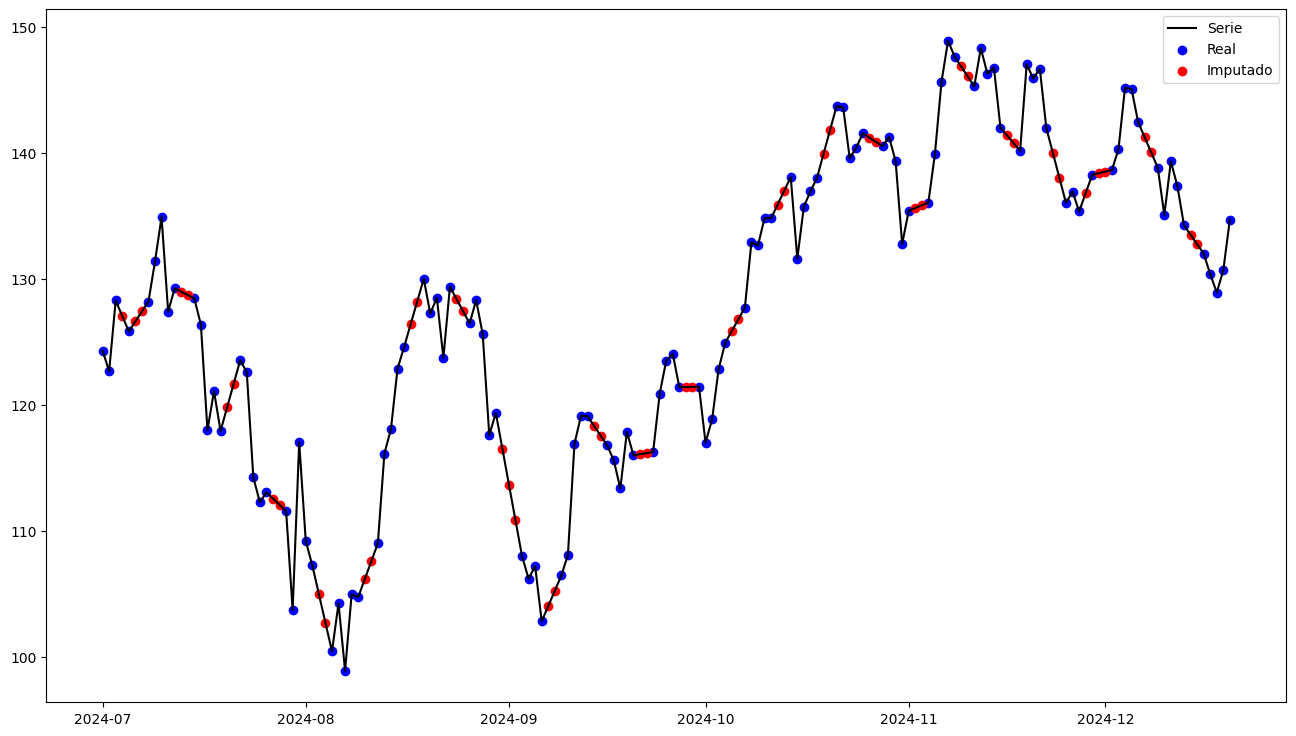

In [16]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cotizacion_lin.index, cotizacion_lin['Close'], color='black', label='Serie')
ax.scatter(cotizacion_lin.index[real_mask], cotizacion_lin['Close'][real_mask], color='blue', label='Real')
ax.scatter(cotizacion_lin.index[imputado_mask], cotizacion_lin['Close'][imputado_mask], color='red', label='Imputado')

ax.legend()
plt.show()

### Interpolación Polinomial

**Polynomial (Polinómica):** Utiliza un polinomio de grado $ n $ para ajustar los puntos de datos, con la forma general:

$$
y(x) = a_n x^n + a_{n-1} x^{n-1} + \cdots + a_1 x + a_0
$$

La ecuación depende de la cantidad de puntos y el grado del polinomio ajustado, lo que puede generar una mayor flexibilidad en los datos.

In [17]:
cotizacion_pol = cotizacion.copy()

In [18]:
cotizacion_pol = cotizacion_pol.resample('D').interpolate(method='polynomial',order=3)

In [19]:
cotizacion_pol['dato'] = ['real' if idx in cotizacion.index else 'Imputado' for idx in cotizacion_pol.index]

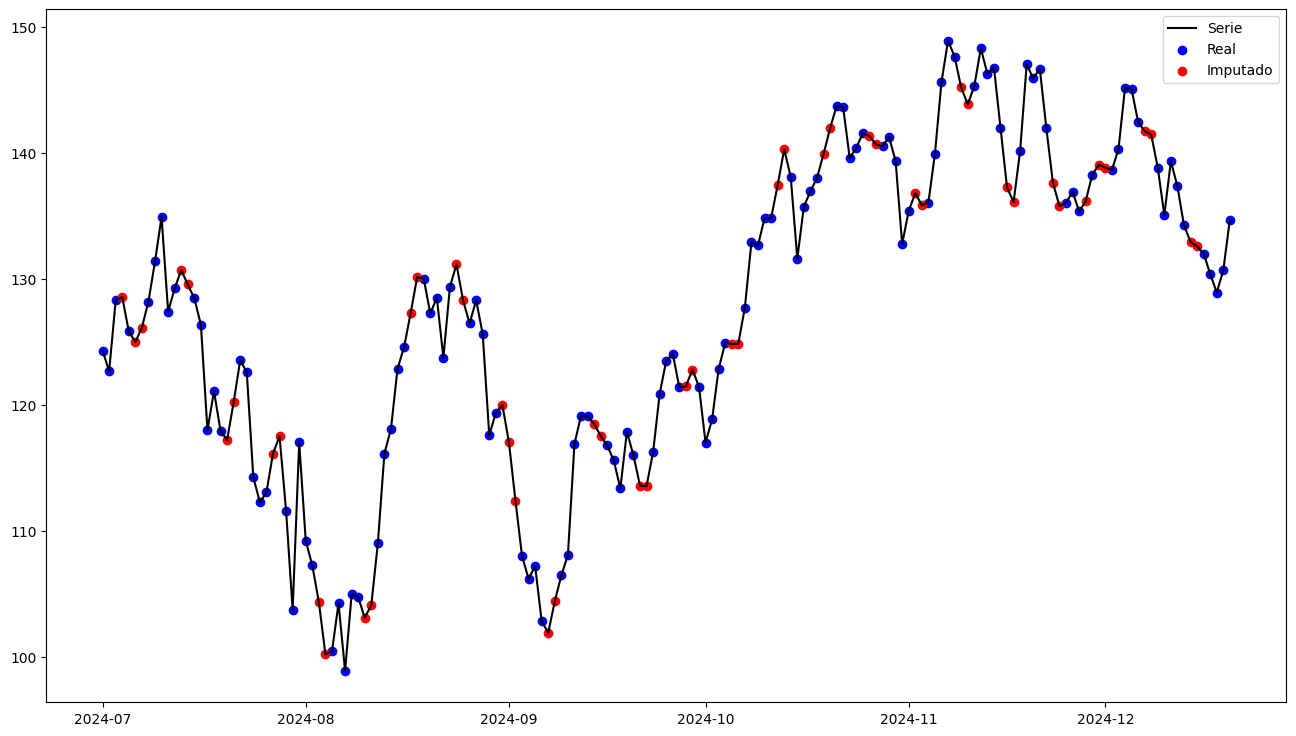

In [20]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cotizacion_pol.index, cotizacion_pol['Close'], color='black', label='Serie')
ax.scatter(cotizacion_pol.index[real_mask], cotizacion_pol['Close'][real_mask], color='blue', label='Real')
ax.scatter(cotizacion_pol.index[imputado_mask], cotizacion_pol['Close'][imputado_mask], color='red', label='Imputado')

ax.legend()
plt.show()

### Interpolación Spline

**Spline:** Usualmente se utiliza el **spline cúbico**, que consiste en una serie de polinomios de tercer grado. Cada polinomio $ S_i(x) $ que conecta los puntos de datos tiene la forma:

$$
S_i(x) = a_i (x - x_i)^3 + b_i (x - x_i)^2 + c_i (x - x_i) + d_i
$$

Estos polinomios se ajustan de manera que sean continuos en su primera y segunda derivada, lo que asegura suavidad en los puntos de transición entre tramos.

In [21]:
cotizacion_spline = cotizacion.copy()

In [22]:
cotizacion_spline = cotizacion_spline.resample('D').interpolate(method='spline',order=3)

In [23]:
cotizacion_spline['dato'] = ['real' if idx in cotizacion.index else 'Imputado' for idx in cotizacion_spline.index]

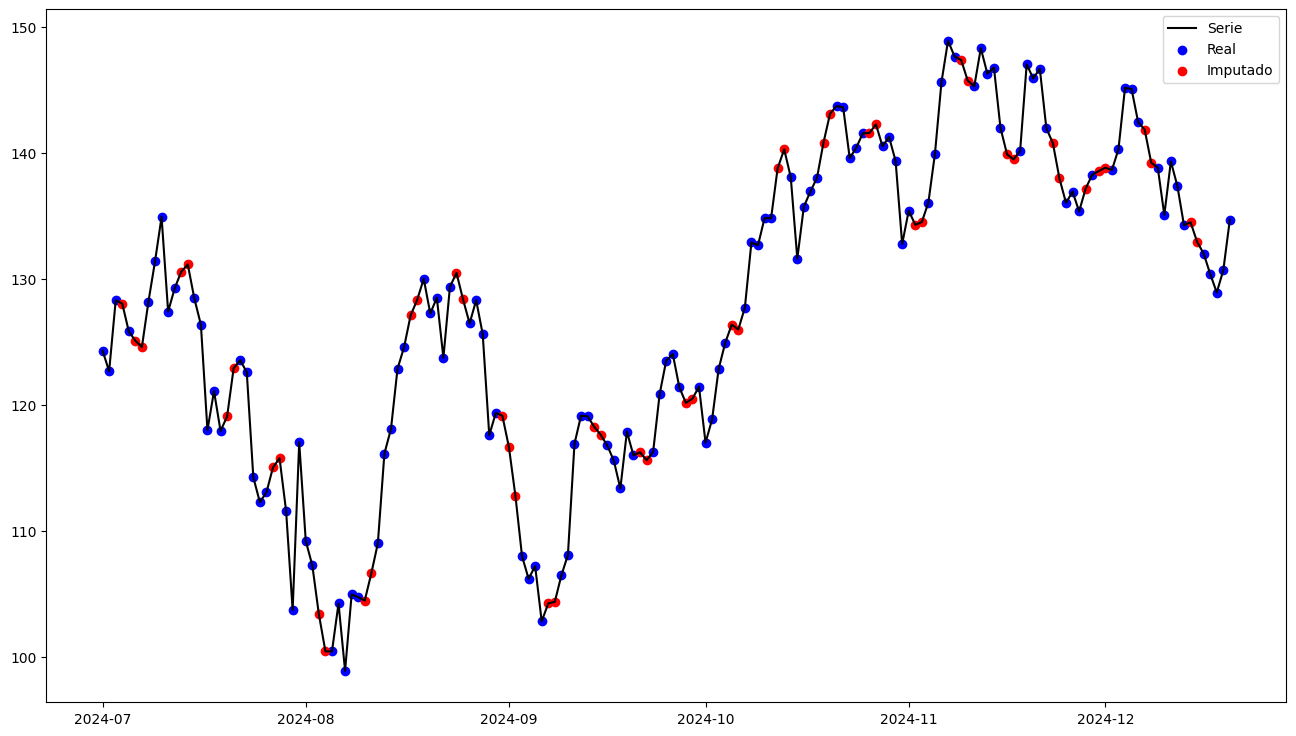

In [24]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cotizacion_spline.index, cotizacion_spline['Close'], color='black', label='Serie')
ax.scatter(cotizacion_spline.index[real_mask], cotizacion_spline['Close'][real_mask], color='blue', label='Real')
ax.scatter(cotizacion_spline.index[imputado_mask], cotizacion_spline['Close'][imputado_mask], color='red', label='Imputado')

ax.legend()
plt.show()

### Interpolación Akima

**Akima:** Basado en interpolación por tramos, el método de Akima calcula los valores faltantes utilizando una fórmula de interpolación que minimiza las oscilaciones entre los puntos de datos. Para cada par de puntos, se utiliza una ecuación de interpolación lineal ajustada por las pendientes entre puntos vecinos.

In [25]:
cotizacion_akima = cotizacion.copy()

In [26]:
cotizacion_akima = cotizacion_akima.resample('D').interpolate(method='akima')

In [27]:
cotizacion_akima['dato'] = ['real' if idx in cotizacion.index else 'Imputado' for idx in cotizacion_akima.index]

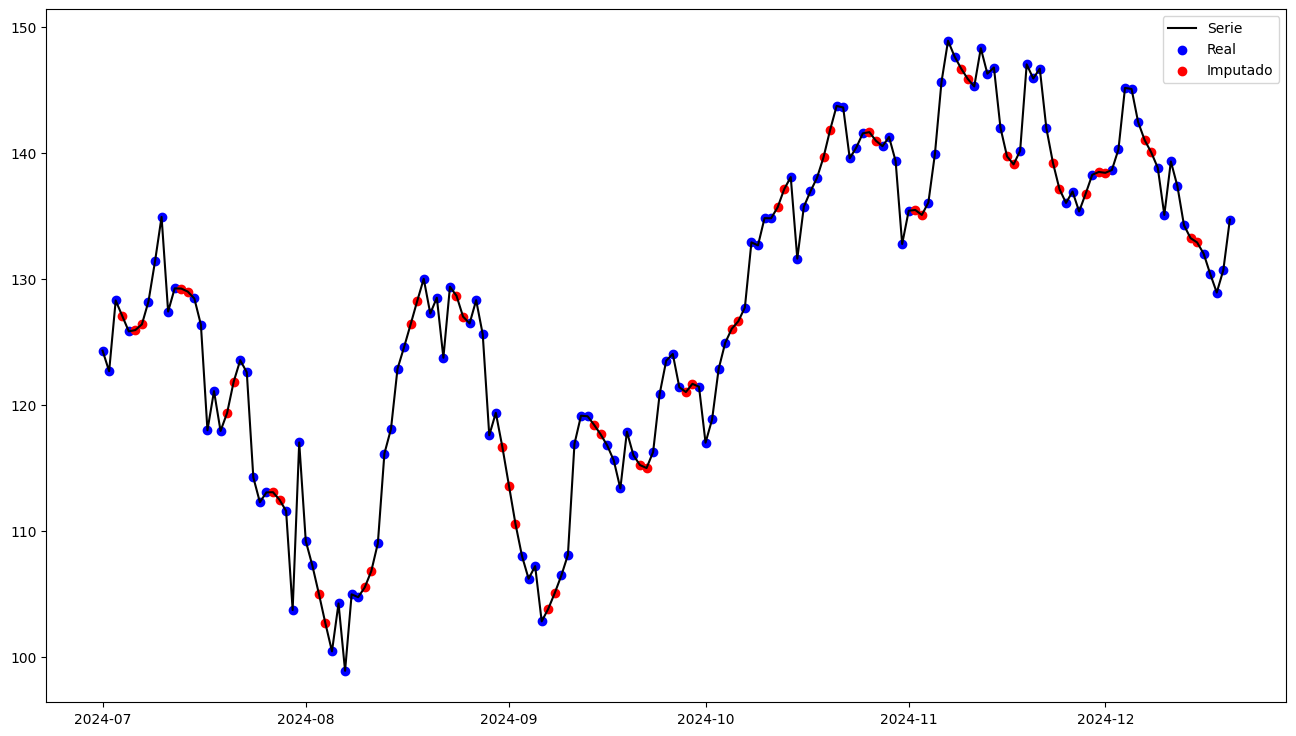

In [28]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cotizacion_akima.index, cotizacion_akima['Close'], color='black', label='Serie')
ax.scatter(cotizacion_akima.index[real_mask], cotizacion_akima['Close'][real_mask], color='blue', label='Real')
ax.scatter(cotizacion_akima.index[imputado_mask], cotizacion_akima['Close'][imputado_mask], color='red', label='Imputado')

ax.legend()
plt.show()

### Interpolación ffill

**Forward Fill (ffill):** Este algoritmo no se basa en una ecuación matemática, sino que simplemente rellena los valores faltantes con el último valor conocido en la serie. Formalmente:

$$
y_{i} = y_{i-1} \quad \text{para todo } i \text{ tal que } y_i \text{ es nulo}
$$

In [29]:
cotizacion_ffill = cotizacion.copy()

In [30]:
cotizacion_ffill = cotizacion_ffill.resample('D').ffill()

In [31]:
cotizacion_ffill['dato'] = ['real' if idx in cotizacion.index else 'Imputado' for idx in cotizacion_ffill.index]

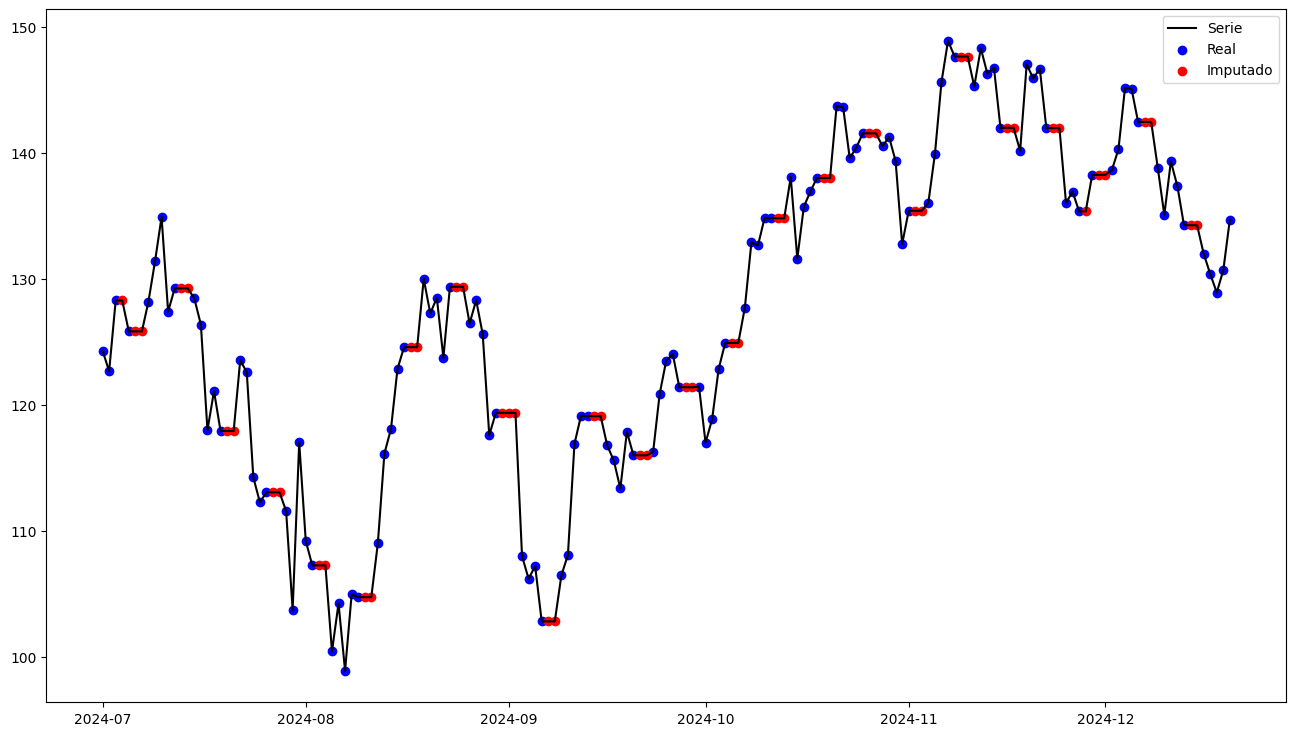

In [32]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cotizacion_ffill.index, cotizacion_ffill['Close'], color='black', label='Serie')
ax.scatter(cotizacion_ffill.index[real_mask], cotizacion_ffill['Close'][real_mask], color='blue', label='Real')
ax.scatter(cotizacion_ffill.index[imputado_mask], cotizacion_ffill['Close'][imputado_mask], color='red', label='Imputado')

ax.legend()
plt.show()

### Interpolación bfill

**Backward Fill (bfill):** Similar al Forward Fill, pero en este caso los valores faltantes se rellenan con el siguiente valor disponible en la serie:

$$
y_{i} = y_{i+1} \quad \text{para todo } i \text{ tal que } y_i \text{ es nulo}
$$


In [33]:
cotizacion_bfill = cotizacion.copy()

In [34]:
cotizacion_bfill = cotizacion_bfill.resample('D').bfill()

In [35]:
cotizacion_bfill['dato'] = ['real' if idx in cotizacion.index else 'Imputado' for idx in cotizacion_bfill.index]

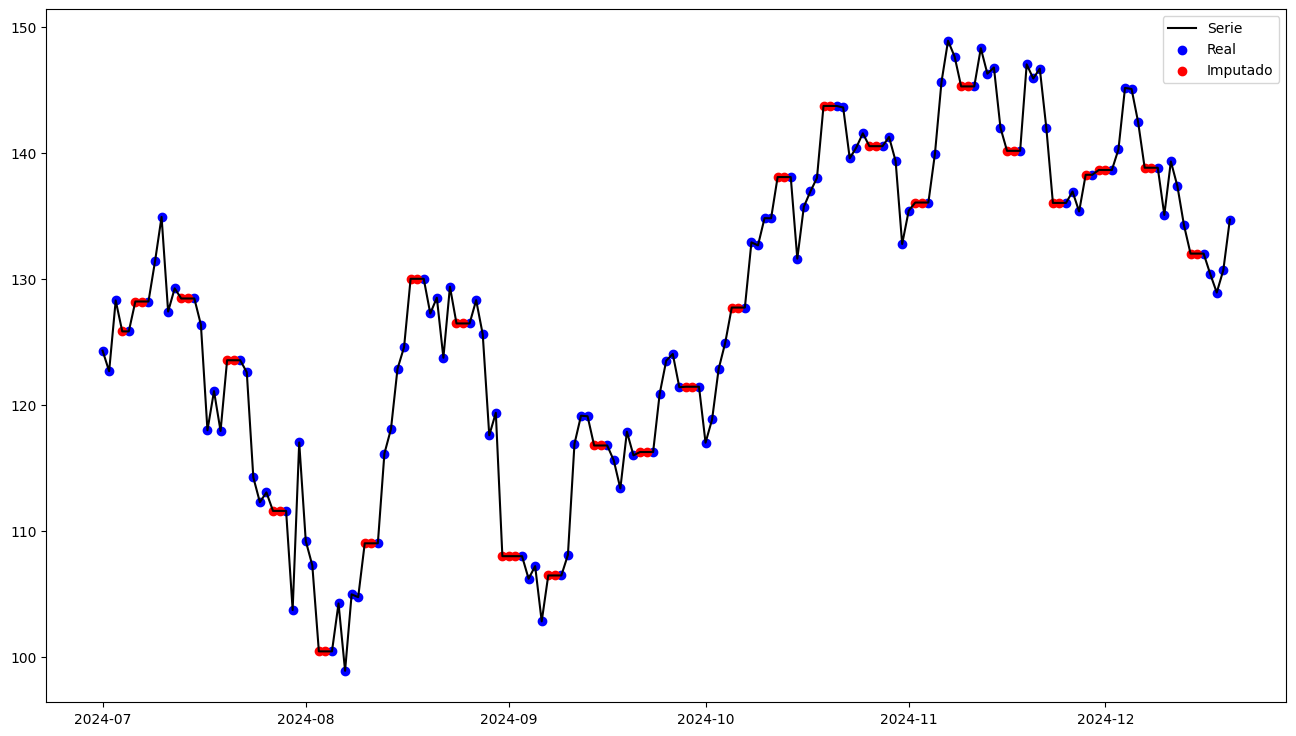

In [36]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cotizacion_bfill.index, cotizacion_bfill['Close'], color='black', label='Serie')
ax.scatter(cotizacion_bfill.index[real_mask], cotizacion_bfill['Close'][real_mask], color='blue', label='Real')
ax.scatter(cotizacion_bfill.index[imputado_mask], cotizacion_bfill['Close'][imputado_mask], color='red', label='Imputado')

ax.legend()
plt.show()

### Comparación

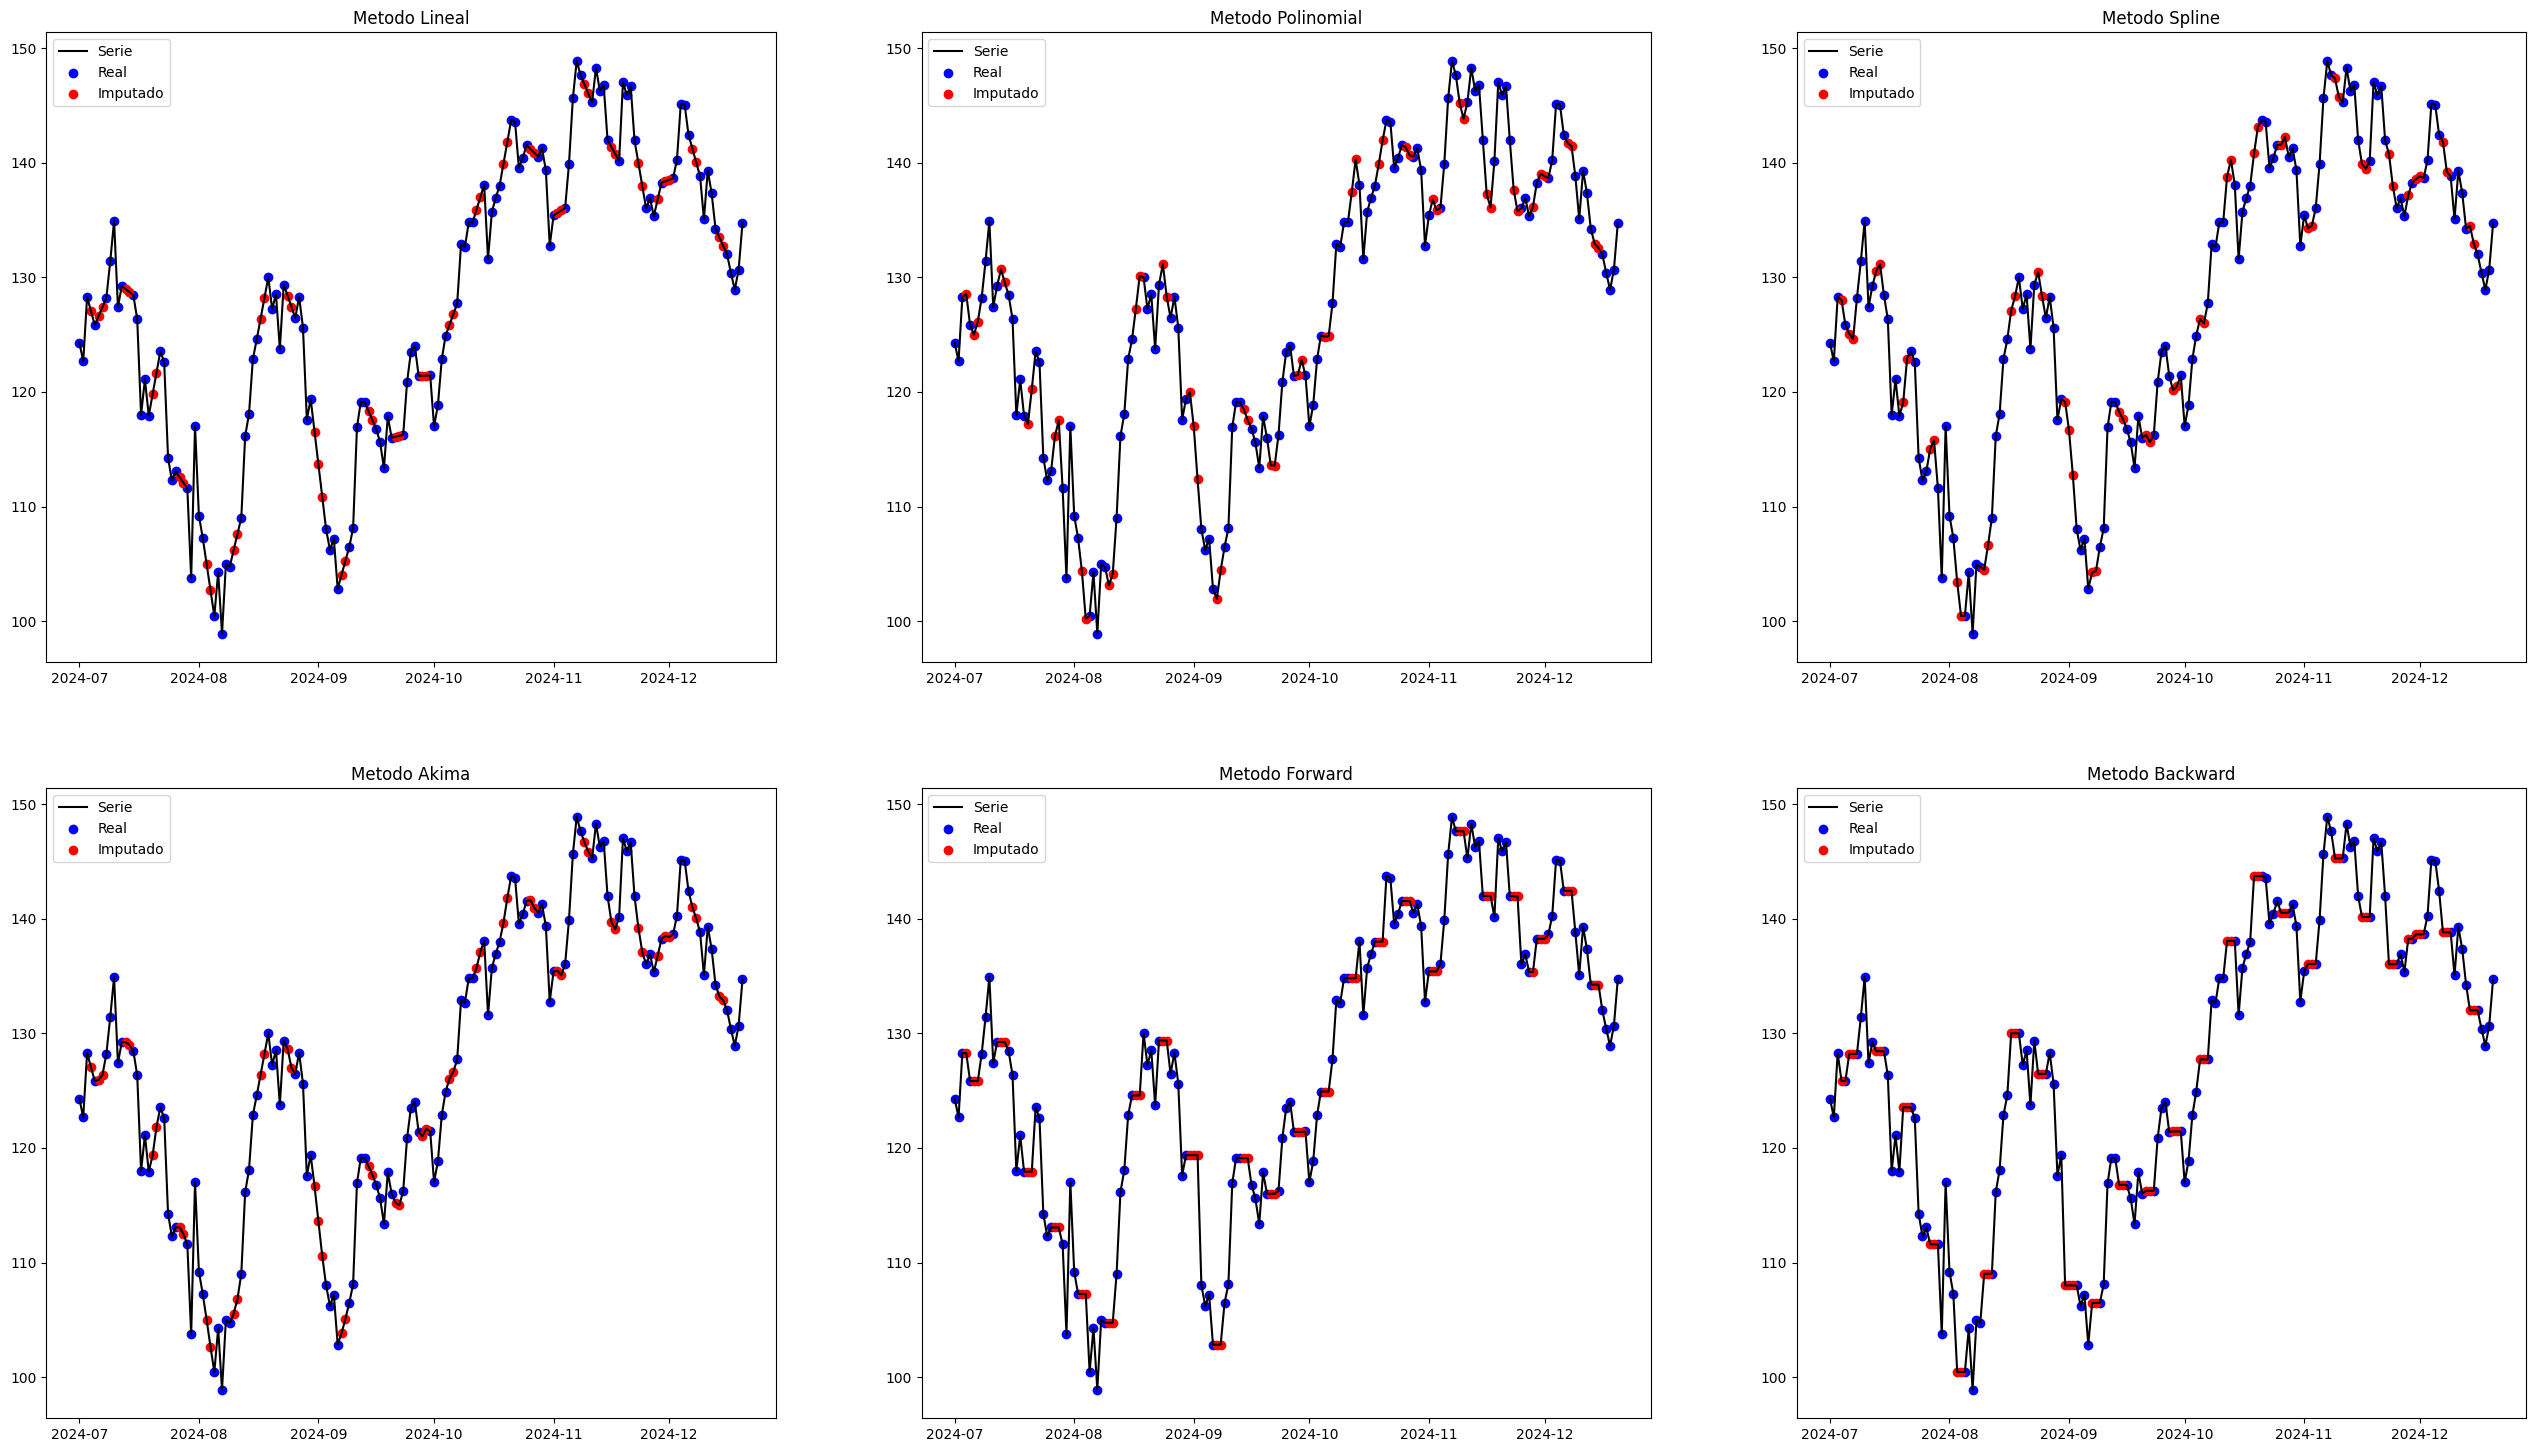

In [37]:
fig,ax = plt.subplots(2,3,figsize=(32,18))

ax[0,0].plot(cotizacion_lin.index, cotizacion_lin['Close'], color='black', label='Serie')
ax[0,0].scatter(cotizacion_lin.index[real_mask], cotizacion_lin['Close'][real_mask], color='blue', label='Real')
ax[0,0].scatter(cotizacion_lin.index[imputado_mask], cotizacion_lin['Close'][imputado_mask], color='red', label='Imputado')
ax[0,0].set_title("Metodo Lineal")
ax[0,0].legend()

ax[0,1].plot(cotizacion_pol.index, cotizacion_pol['Close'], color='black', label='Serie')
ax[0,1].scatter(cotizacion_pol.index[real_mask], cotizacion_pol['Close'][real_mask], color='blue', label='Real')
ax[0,1].scatter(cotizacion_pol.index[imputado_mask], cotizacion_pol['Close'][imputado_mask], color='red', label='Imputado')
ax[0,1].set_title("Metodo Polinomial")
ax[0,1].legend()

ax[0,2].plot(cotizacion_spline.index, cotizacion_spline['Close'], color='black', label='Serie')
ax[0,2].scatter(cotizacion_spline.index[real_mask], cotizacion_spline['Close'][real_mask], color='blue', label='Real')
ax[0,2].scatter(cotizacion_spline.index[imputado_mask], cotizacion_spline['Close'][imputado_mask], color='red', label='Imputado')
ax[0,2].set_title("Metodo Spline")
ax[0,2].legend()

ax[1,0].plot(cotizacion_akima.index, cotizacion_akima['Close'], color='black', label='Serie')
ax[1,0].scatter(cotizacion_akima.index[real_mask], cotizacion_akima['Close'][real_mask], color='blue', label='Real')
ax[1,0].scatter(cotizacion_akima.index[imputado_mask], cotizacion_akima['Close'][imputado_mask], color='red', label='Imputado')
ax[1,0].set_title("Metodo Akima")
ax[1,0].legend()

ax[1,1].plot(cotizacion_ffill.index, cotizacion_ffill['Close'], color='black', label='Serie')
ax[1,1].scatter(cotizacion_ffill.index[real_mask], cotizacion_ffill['Close'][real_mask], color='blue', label='Real')
ax[1,1].scatter(cotizacion_ffill.index[imputado_mask], cotizacion_ffill['Close'][imputado_mask], color='red', label='Imputado')
ax[1,1].set_title("Metodo Forward")
ax[1,1].legend()

ax[1,2].plot(cotizacion_bfill.index, cotizacion_bfill['Close'], color='black', label='Serie')
ax[1,2].scatter(cotizacion_bfill.index[real_mask], cotizacion_bfill['Close'][real_mask], color='blue', label='Real')
ax[1,2].scatter(cotizacion_bfill.index[imputado_mask], cotizacion_bfill['Close'][imputado_mask], color='red', label='Imputado')
ax[1,2].set_title("Metodo Backward")
ax[1,2].legend()

plt.show()